In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# set where alpha = 1
condition = lambda _: _[0]**2 + _[1]**2 < 1

In [7]:
sizeX,sizeY = 1,1
nX,nY = 10,10
V = []
for x,y in [(x,y) for x in range(nX) for y in range(nY)]:
        V.append((sizeX/nX*(x+0.5),
                  sizeY/nY*(y+0.5)))
M = []
div = 200 # linspace
dX,dY = sizeX/nX,sizeY/nY
A = dX*dY
dX,dY = dX/2,dY/2
i = 0
for p in V:
    c = {_:condition(_) for _ in [(p[0]+dX,p[1]+dY),(p[0]+dX,p[1]-dY),(p[0]-dX,p[1]+dY),(p[0]-dX,p[1]-dY)]} # condition at nodes
    if all(_ == list(c.values())[0] for _ in list(c.values())): # if values equal, great
        M.append(1 if list(c.values())[0] else 0)
    else: # integrate
        s = []
        s1 = [(p[0]+dX,_) for _ in np.linspace(p[1]-dY,p[1]+dY,div)] # cell borders
        s2 = [(p[0]-dX,_) for _ in np.linspace(p[1]-dY,p[1]+dY,div)]
        s3 = [(_,p[1]+dY) for _ in np.linspace(p[0]-dX,p[0]+dX,div)]
        s4 = [(_,p[1]-dY) for _ in np.linspace(p[0]-dX,p[0]+dX,div)]
        for _ in [s1,s2,s3,s4]:
            for i in range(len(_)-1): 
                if condition(_[i])!=condition(_[i+1]): s.append(_[i+1]) # the two interface intersection points
        e = [_ for _ in c.keys() if c.get(_) == True ] # True points for integration direction
        #finding area
        if len(e)==3: # triangle
            e = [_ for _ in c.keys() if c.get(_) == False ] # next if
        if len(e)==1: # triangle
            'abs needed?'
            x = abs(abs(e[0][0]-s[0][0])-abs(e[0][0]-s[1][0]))
            y = abs(abs(e[0][1]-s[0][1])-abs(e[0][1]-s[1][1]))
            M.append(a := 0.5*x*y/A if condition(e[0]) else 1-0.5*x*y/A) # if previous if
        if len(e)==2: # trapezoid
            h = [min([((_[0]-s[0][0])**2+(_[1]-s[0][1])**2)**0.5,
                      ((_[0]-s[1][0])**2+(_[1]-s[1][1])**2)**0.5]) for _ in e]
            if abs(e[0][0]-e[1][0]) > abs(e[0][1]-e[1][1]): d = dX*2
            else: d = dY*2
            M.append((0.5*d*(h[0]+h[1]))/A)
# for _ in M: print(_) # OpenFOAM alpha output

---

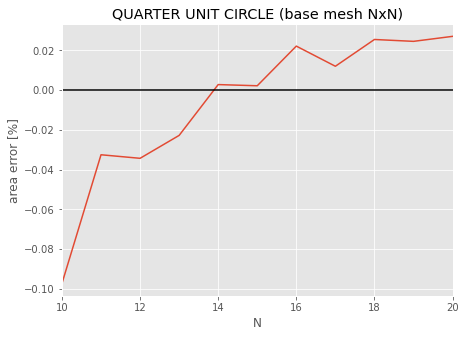

In [8]:
plt.style.use('ggplot')
l = []
for _ in (n:=range(10,20+1)):
    sizeX,sizeY = 1,1
    nX,nY = _,_
    V = []
    for x,y in [(x,y) for x in range(nX) for y in range(nY)]:
            V.append((sizeX/nX*(x+0.5),
                    sizeY/nY*(y+0.5)))
    M = []
    div = 200
    dX,dY = sizeX/nX,sizeY/nY
    A = dX*dY
    dX,dY = dX/2,dY/2
    i = 0
    for p in V:
        c = {_:condition(_) for _ in [(p[0]+dX,p[1]+dY),(p[0]+dX,p[1]-dY),(p[0]-dX,p[1]+dY),(p[0]-dX,p[1]-dY)]} 
        if all(_ == list(c.values())[0] for _ in list(c.values())): 
            M.append(1 if list(c.values())[0] else 0)
        else: 
            s = []
            s1 = [(p[0]+dX,_) for _ in np.linspace(p[1]-dY,p[1]+dY,div)] 
            s2 = [(p[0]-dX,_) for _ in np.linspace(p[1]-dY,p[1]+dY,div)]
            s3 = [(_,p[1]+dY) for _ in np.linspace(p[0]-dX,p[0]+dX,div)]
            s4 = [(_,p[1]-dY) for _ in np.linspace(p[0]-dX,p[0]+dX,div)]
            for _ in [s1,s2,s3,s4]:
                for i in range(len(_)-1): 
                    if condition(_[i])!=condition(_[i+1]): s.append(_[i+1]) 
            e = [_ for _ in c.keys() if c.get(_) == True ] 
            if len(e)==3: 
                e = [_ for _ in c.keys() if c.get(_) == False ] 
            if len(e)==1: 
                'abs needed?'
                x = abs(abs(e[0][0]-s[0][0])-abs(e[0][0]-s[1][0]))
                y = abs(abs(e[0][1]-s[0][1])-abs(e[0][1]-s[1][1]))
                M.append(a := 0.5*x*y/A if condition(e[0]) else 1-0.5*x*y/A) 
            if len(e)==2: 
                h = [min([((_[0]-s[0][0])**2+(_[1]-s[0][1])**2)**0.5,
                        ((_[0]-s[1][0])**2+(_[1]-s[1][1])**2)**0.5]) for _ in e]
                if abs(e[0][0]-e[1][0]) > abs(e[0][1]-e[1][1]): d = dX*2
                else: d = dY*2
                M.append((0.5*d*(h[0]+h[1]))/A)
    l.append(100*(sum([_*(sizeX/nX*sizeY/nY) for _ in M])-0.785)/0.785)
plt.figure(figsize=(7,5))
plt.plot(n,l)
plt.axhline(0,color='k')
plt.xlabel('N')
plt.ylabel('area error [%]')
plt.xlim(n[0],n[-1])
plt.title('QUARTER UNIT CIRCLE (base mesh NxN)')
plt.savefig('error',dpi=300,facecolor='white')